# EDA Proyecto individual MLOps

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings

Cargar los DataFrames desde los archivos parquet


In [26]:
df_games=pd.read_parquet('./data/steam_games.parquet')
df_items=pd.read_parquet('./data/users_items.parquet')
df_reviews=pd.read_parquet('./data/users_reviews.parquet')

Suprimir todos los warnings


In [27]:
warnings.filterwarnings('ignore')

Merge entre los DataFrames steam_games y user_reviews utilizando la columna 'item_id' como clave

In [28]:
merged_df = pd.merge(df_games, df_reviews, on='item_id')

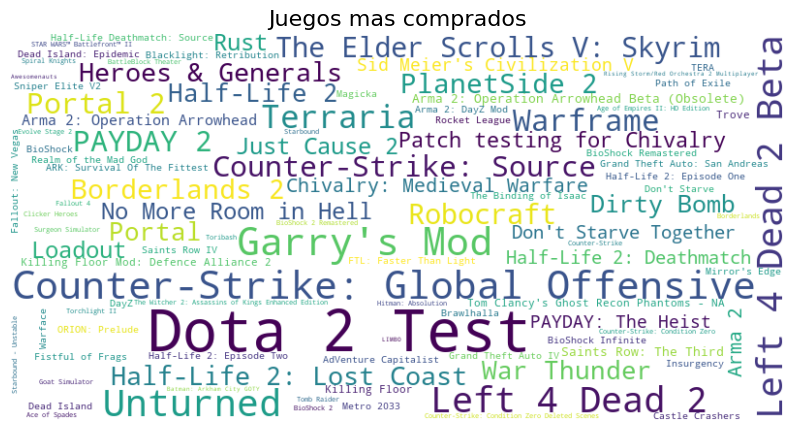

In [55]:
# Nube de palabras con los videojuegos mas comprados
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Agrupa por 'item_name' y cuenta la frecuencia de cada juego
frecuencia_juegos = df_items['item_name'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(frecuencia_juegos)

# Muestra la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Juegos mas comprados', fontsize=16)
plt.show()

Gráfico de dispersión para la relación entre año y precio


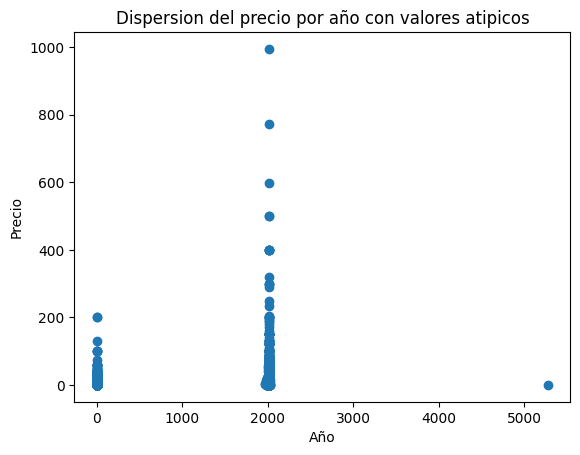

In [29]:
plt.scatter(df_games['año_lanzamiento'], df_games['price'])
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Dispersion del precio por año con valores atipicos')
plt.show()

Estadísticas descriptivas para columna precio

In [30]:
df_games['price'].describe()

count    32133.00000
mean         8.48619
std         15.66249
min          0.00000
25%          1.99000
50%          4.99000
75%          9.99000
max        995.00000
Name: price, dtype: float64

In [31]:
# Identificamos outliers en la columna precio y los eliminamos
# Calcula el primer y tercer cuartil de price.
Q1 = df_games['price'].quantile(0.25)
Q3 = df_games['price'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [32]:
# Elimina filas con outliers en price
df_games_sinoutlaiers = df_games[(df_games['price'] >= lower_bound) & (df_games['price'] <= upper_bound)]

In [33]:
df_games_sinoutlaiers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30259 entries, 0 to 32132
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           30259 non-null  object 
 1   app_name         30259 non-null  object 
 2   tags             30259 non-null  object 
 3   price            30259 non-null  float64
 4   item_id          30259 non-null  int64  
 5   developer        30259 non-null  object 
 6   año_lanzamiento  30259 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.8+ MB


Top de Juegos por tiempo de juego


In [34]:
top_juegos_jugados = df_items.sort_values(by='playtime_forever', ascending=False).head(10)


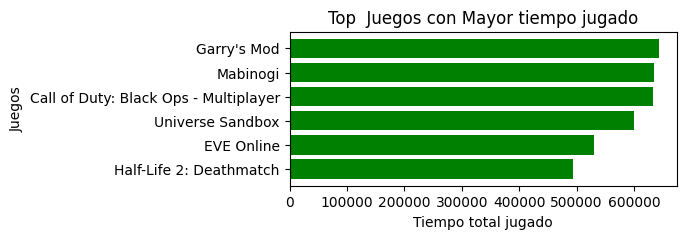

In [45]:
# Ajusta el tamaño del gráfico
plt.figure(figsize=(5, 2))

# Graficar los datos
plt.barh(top_juegos_jugados['item_name'], top_juegos_jugados['playtime_forever'], color='green')
plt.xlabel('Tiempo total jugado')  
plt.ylabel('Juegos')
plt.title('Top  Juegos con Mayor tiempo jugado')

# Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.
plt.gca().invert_yaxis()  

plt.show()

In [36]:
#Proporción reseñas positivas vs negativas
# Convertimos los valores booleanos de recommend a valores numéricos
df_reviews['recommend'] = df_reviews['recommend'].astype(int)


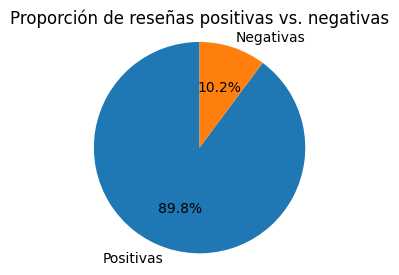

In [37]:
 # Ajusta el tamaño del gráfico.
plt.figure(figsize=(3, 3)) 

# Contar el número de reseñas positivas y negativas
num_positivas = len(df_reviews[df_reviews['recommend'] == 1])
num_negativas = len(df_reviews[df_reviews['recommend'] == 0])

# Graficar los datos
plt.pie([num_positivas, num_negativas], labels=['Positivas', 'Negativas'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ajustar el aspecto del gráfico para que sea un círculo.
plt.title('Proporción de reseñas positivas vs. negativas')  # Título del gráfico

# Mostrar el gráfico
plt.show()

TOP 5 Juegos más recomendados

In [ ]:
# Seleccionar los 5 juegos más recomendados y eliminar los duplicados
top_recomendados = merged_df.drop_duplicates(subset='app_name').nlargest(5, 'recommend')

# Crear un gráfico de torta  que muestra el nombre del juego y la cantidad de recomendaciones
plt.pie(top_recomendados['recommend'], labels=top_recomendados['app_name'], autopct='%1.1f%%')
plt.title('Los 5 juegos más recomendados')
plt.show()

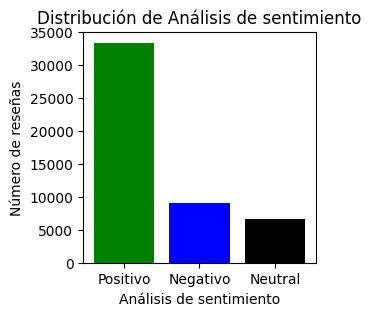

In [38]:
#Distribución de Análisis de Sentimiento
plt.figure(figsize=(3, 3))  # Ajusta el tamaño del gráfico.

# Contar el número de reseñas positivas, negativas y neutrales
num_positivas = len(df_reviews[df_reviews['sentiment_analysis'] == 2])
num_negativas = len(df_reviews[df_reviews['sentiment_analysis'] == 1])
num_neutrales = len(df_reviews[df_reviews['sentiment_analysis'] == 0])

# Graficar los datos
plt.bar(['Positivo', 'Negativo', 'Neutral'], [num_positivas, num_negativas, num_neutrales], color=['green', 'blue', 'black'])
plt.xlabel('Análisis de sentimiento')  # Etiqueta del eje X
plt.ylabel('Número de reseñas')  # Etiqueta del eje Y
plt.title('Distribución de Análisis de sentimiento')  # Título del gráfico

# Mostrar el gráfico
plt.show()


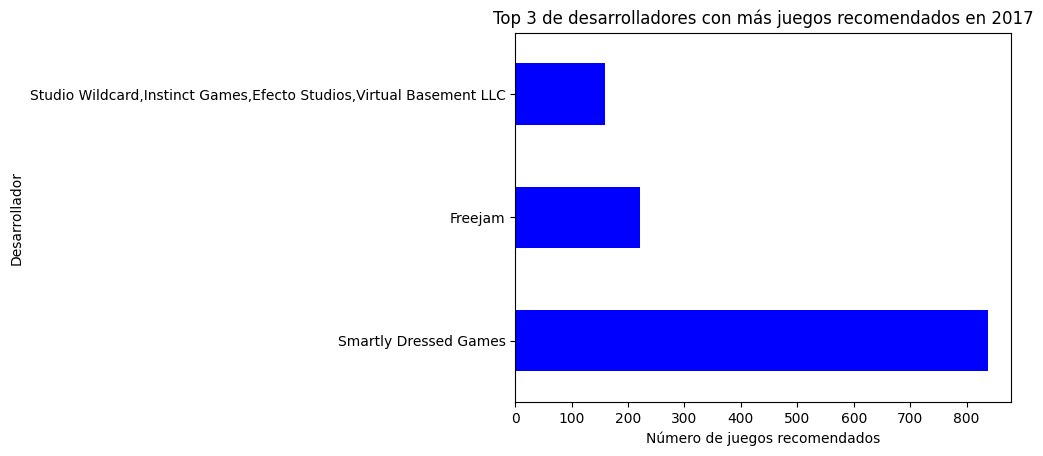

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los juegos por año y por recomendación positiva
df_year = merged_df[(merged_df['año_lanzamiento'] == 2017) & (merged_df['recommend'] == True)]

# Contar el número de juegos recomendados por desarrollador y devolver los tres primeros desarrolladores
top_desarrolladores = df_year['developer'].value_counts().head(3)

# Crear un gráfico de barras horizontales que muestre el número de juegos recomendados por desarrollador
top_desarrolladores.plot.barh(color='blue')
plt.title('Top 3 de desarrolladores con más juegos recomendados en 2017')
plt.xlabel('Número de juegos recomendados')
plt.ylabel('Desarrollador')
plt.show()